## 1. Scrape Prius Data From Cars.com

In [1]:
import time
import random
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers_list = [
    # Firefox 77 Mac
     {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Referer": "https://www.google.com/",
        "DNT": "1",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1"
    },
    # Firefox 77 Windows
    {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate, br",
        "Referer": "https://www.google.com/",
        "DNT": "1",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 83 Mac
    {
        "Connection": "keep-alive",
        "DNT": "1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Dest": "document",
        "Referer": "https://www.google.com/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
    },
    # Chrome 83 Windows 
    {
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Sec-Fetch-Site": "same-origin",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-User": "?1",
        "Sec-Fetch-Dest": "document",
        "Referer": "https://www.google.com/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9"
    }
]


def get_car_data(car_div):
    car_data = {}

    car_data['stock_type'] = car_div.find('p', class_='stock-type').text
    car_data['title'] = car_div.find('h2', class_='title').text
    
    if car_div.find('div', class_='mileage') is not None:
        car_data['mileage'] = car_div.find('div', class_='mileage').text
    else:
        car_data['mileage'] = None
    
    car_data['price'] = car_div.find('span', class_='primary-price').text
    
    if car_div.find('div', class_='dealer-name') is not None:
        car_data['dealer_name'] = car_div.find('div', class_='dealer-name').text
        
        phone_link = car_div.find('a', class_='sds-button--secondary contact-by-phone')
        if phone_link:
            car_data['dealer_phone'] = phone_link.get('data-phone-number')
        else:
            car_data['dealer_phone'] = None

        email_button = car_div.find('button', class_='sds-button lead-form-modal-button')
        if email_button:
            car_data['dealer_id'] = email_button.get('data-dealer-customer-id')
        else:
            car_data['dealer_id'] = None
    
    else:
        car_data['dealer_name'] = "Private Seller"
        car_data['dealer_phone'] = None
        car_data['dealer_id'] = None
        
    car_data['miles_from_me'] = car_div.find('div', class_='miles-from').text.strip()

    return car_data

def get_car_list(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    # Get all car listing divs
    car_divs = soup.find_all('div', class_='vehicle-card-main js-gallery-click-card')
    car_list = [get_car_data(car_div) for car_div in car_divs]
    return car_list

def main():
    car_list = []

    # Iterate over all the 5 pages
    for page in range(1, 6):
        headers = random.choice(headers_list)  # to mimic a real browser
        url = (
            "https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min="
            "&makes[]=toyota&maximum_distance=all&mileage_max=&models[]=toyota-prius&monthly_payment="
            f"&page={page}&page_size=100&sort=best_match_desc&stock_type=all&year_max=2010&year_min=2008&zip=20854"
        )
        r = requests.Session()
        r.headers = headers
        response = r.get(url)

        html_text = response.text
        car_list.extend(get_car_list(html_text))
        print(page)
        # Delaying the requests by a random amount of time
        time.sleep(random.randint(1, 5))

    # creating a dataframe
    df = pd.DataFrame(car_list)
    return df


In [2]:
from datetime import datetime

df2 = main()

# Get the current date and time
current_datetime = datetime.now().strftime("%m-%d-%y %H:%M")

# Define the file name with the current date and time
file_name = f"Prius Data {current_datetime}.csv"

# Export the DataFrame to CSV
df2.to_csv(file_name, index=False)

1
2
3
4
5


In [3]:
df3 = pd.read_csv(file_name)
df3

,stock_type,title,mileage,price,dealer_name,dealer_phone,dealer_id,miles_from_me
0,Used,2010 Toyota Prius IV,"130,000 mi.","$7,000",Private Seller,NaN,NaN,43 mi. from 20854
1,Used,2010 Toyota Prius IV,"99,000 mi.","$11,499",Private Seller,NaN,NaN,96 mi. from 20854
2,Used,2008 Toyota Prius Base,"61,760 mi.","$11,999",\nTrend Auto Trader\n,2.678752e+09,6061480.0,138 mi. from 20854
3,Used,2010 Toyota Prius II,"177,135 mi.","$7,499",\nUDrive USA\n,7.578520e+09,6062952.0,165 mi. from 20854
4,Used,2010 Toyota Prius II,"128,442 mi.","$8,995",\nMula Auto Group\n,9.088426e+09,6050980.0,175 mi. from 20854
...,...,...,...,...,...,...,...,...
464,Used,2010 Toyota Prius I,"85,813 mi.","$13,000",\nSunwise Fairfield Preowned Superstore\n,7.074027e+09,6000795.0,"2,397 mi. from 20854"
465,Used,2010 Toyota Prius II,"185,858 mi.","$8,651",\nCapitol Ford\n,8.884862e+09,5350898.0,"2,405 mi. from 20854"
466,Used,2009 Toyota Prius Base (CVT-E),"80,083 mi.","$11,591",\nToyota Sunnyvale\n,4.085982e+09,25467.0,"2,412 mi. from 20854"
467,Used,2010 Toyota Prius III,"90,737 mi.","$11,999",\nCrown Vic Auto Sales\n,4.156924e+09,6058066.0,"2,423 mi. from 20854"


## 2. Clean Data, Handle Missing Values, and Feature Engineer

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stock_type     469 non-null    object 
 1   title          469 non-null    object 
 2   mileage        468 non-null    object 
 3   price          469 non-null    object 
 4   dealer_name    469 non-null    object 
 5   dealer_phone   451 non-null    float64
 6   dealer_id      451 non-null    float64
 7   miles_from_me  469 non-null    object 
dtypes: float64(2), object(6)
memory usage: 29.4+ KB


In [5]:
# Extract year from 'title' column
df3['year'] = df3['title'].str.extract('(\d{4})').astype(int)
df3.head()

,stock_type,title,mileage,price,dealer_name,dealer_phone,dealer_id,miles_from_me,year
0,Used,2010 Toyota Prius IV,"130,000 mi.","$7,000",Private Seller,NaN,NaN,43 mi. from 20854,2010
1,Used,2010 Toyota Prius IV,"99,000 mi.","$11,499",Private Seller,NaN,NaN,96 mi. from 20854,2010
2,Used,2008 Toyota Prius Base,"61,760 mi.","$11,999",\nTrend Auto Trader\n,2.678752e+09,6061480.0,138 mi. from 20854,2008
3,Used,2010 Toyota Prius II,"177,135 mi.","$7,499",\nUDrive USA\n,7.578520e+09,6062952.0,165 mi. from 20854,2010
4,Used,2010 Toyota Prius II,"128,442 mi.","$8,995",\nMula Auto Group\n,9.088426e+09,6050980.0,175 mi. from 20854,2010


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stock_type     469 non-null    object 
 1   title          469 non-null    object 
 2   mileage        468 non-null    object 
 3   price          469 non-null    object 
 4   dealer_name    469 non-null    object 
 5   dealer_phone   451 non-null    float64
 6   dealer_id      451 non-null    float64
 7   miles_from_me  469 non-null    object 
 8   year           469 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 33.1+ KB


In [7]:
# define column names
column_names = ['AreaCode', 'City', 'State', 'Country', 'Latitude', 'Longitude']

# read csv file into a dataframe
area_df = pd.read_csv('us-area-code-cities.csv', names=column_names)
area_df.head()

,AreaCode,City,State,Country,Latitude,Longitude
0,201,Bayonne,New Jersey,US,40.66871,-74.11431
1,201,Bergenfield,New Jersey,US,40.92760,-73.99736
2,201,Cliffside Park,New Jersey,US,40.82149,-73.98764
3,201,Englewood,New Jersey,US,40.89288,-73.97264
4,201,Fair Lawn,New Jersey,US,40.94038,-74.13181


In [8]:
# group by area code and aggregate cities into lists
area_df = area_df.groupby('AreaCode').agg({'City': list, 'State': 'first'}).reset_index()

df4 = df3
# replace missing dealer_phone values and extract area code
df4['dealer_phone'] = df4['dealer_phone'].astype(str)
df4['dealer_phone'].fillna('No Phone Number', inplace=True)
df4['AreaCode'] = df4['dealer_phone'].apply(lambda x: 'No Area Code' if x == 'No Phone Number' else x[:3])

# change the type of 'area_code' in the area_df dataframe to string to match with df3 dataframe
area_df['AreaCode'] = area_df['AreaCode'].astype(str)

# create new columns in the original DataFrame based on the area code mapping
df4 = df4.merge(area_df, on='AreaCode', how='left')

# replace missing city and state values
df4['City'].fillna('Unknown', inplace=True)
df4['State'].fillna('Unknown', inplace=True)

In [9]:
df4

,stock_type,title,mileage,price,dealer_name,dealer_phone,dealer_id,miles_from_me,year,AreaCode,City,State
0,Used,2010 Toyota Prius IV,"130,000 mi.","$7,000",Private Seller,nan,NaN,43 mi. from 20854,2010,nan,Unknown,Unknown
1,Used,2010 Toyota Prius IV,"99,000 mi.","$11,499",Private Seller,nan,NaN,96 mi. from 20854,2010,nan,Unknown,Unknown
2,Used,2008 Toyota Prius Base,"61,760 mi.","$11,999",\nTrend Auto Trader\n,2678752041.0,6061480.0,138 mi. from 20854,2008,267,"[Levittown, Philadelphia]",Pennsylvania
3,Used,2010 Toyota Prius II,"177,135 mi.","$7,499",\nUDrive USA\n,7578520273.0,6062952.0,165 mi. from 20854,2010,757,"[Chesapeake, Hampton, Newport News, Norfolk, P...",Virginia
4,Used,2010 Toyota Prius II,"128,442 mi.","$8,995",\nMula Auto Group\n,9088425869.0,6050980.0,175 mi. from 20854,2010,908,"[Cranford, Elizabeth, Hillside, Linden, South ...",New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...
464,Used,2010 Toyota Prius I,"85,813 mi.","$13,000",\nSunwise Fairfield Preowned Superstore\n,7074026852.0,6000795.0,"2,397 mi. from 20854",2010,707,"[Benicia, Eureka, Fairfield, Napa, Petaluma, R...",California
465,Used,2010 Toyota Prius II,"185,858 mi.","$8,651",\nCapitol Ford\n,8884861597.0,5350898.0,"2,405 mi. from 20854",2010,888,Unknown,Unknown
466,Used,2009 Toyota Prius Base (CVT-E),"80,083 mi.","$11,591",\nToyota Sunnyvale\n,4085982472.0,25467.0,"2,412 mi. from 20854",2009,408,"[Campbell, Gilroy, Los Gatos, Milpitas, Morgan...",California
467,Used,2010 Toyota Prius III,"90,737 mi.","$11,999",\nCrown Vic Auto Sales\n,4156924033.0,6058066.0,"2,423 mi. from 20854",2010,415,"[Novato, San Anselmo, South San Francisco, San...",California


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 468
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stock_type     469 non-null    object 
 1   title          469 non-null    object 
 2   mileage        468 non-null    object 
 3   price          469 non-null    object 
 4   dealer_name    469 non-null    object 
 5   dealer_phone   469 non-null    object 
 6   dealer_id      451 non-null    float64
 7   miles_from_me  469 non-null    object 
 8   year           469 non-null    int64  
 9   AreaCode       469 non-null    object 
 10  City           469 non-null    object 
 11  State          469 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 47.6+ KB


In [11]:
import numpy as np

# mileage column
# fill NaN values with a string indicating missing data
df4['mileage'] = df4['mileage'].fillna('0.1 mi.')
# remove 'mi.' and comma from the mileage string, then convert it to float
df4['mileage'] = df4['mileage'].str.replace('mi.', '', regex=False).str.replace(',', '').astype(float)
# replace 0.1 (which was missing values) with the mean
mean_mileage = df4.loc[df4['mileage'] != 0, 'mileage'].mean()
df4.loc[df4['mileage'] == 0.1, 'mileage'] = mean_mileage
# convert to integer
df4['mileage'] = df4['mileage'].astype(int)


# price column
df4['price'] = df4['price'].str.replace('$', '', regex=False).str.replace(',', '')

# replace 'Not Priced' with NaN
df4.loc[df4['price'] == 'Not Priced', 'price'] = np.nan

# convert to float
df4['price'] = df4['price'].astype(float)

# replace NaN values with the mean
df4['price'].fillna(df4['price'].mean(), inplace=True)

# convert to integer if necessary
df4['price'] = df4['price'].astype(int)

#remove '\n'
df4['dealer_name'] = df4['dealer_name'].str.replace('\n', '')

df4

,stock_type,title,mileage,price,dealer_name,dealer_phone,dealer_id,miles_from_me,year,AreaCode,City,State
0,Used,2010 Toyota Prius IV,130000,7000,Private Seller,nan,NaN,43 mi. from 20854,2010,nan,Unknown,Unknown
1,Used,2010 Toyota Prius IV,99000,11499,Private Seller,nan,NaN,96 mi. from 20854,2010,nan,Unknown,Unknown
2,Used,2008 Toyota Prius Base,61760,11999,Trend Auto Trader,2678752041.0,6061480.0,138 mi. from 20854,2008,267,"[Levittown, Philadelphia]",Pennsylvania
3,Used,2010 Toyota Prius II,177135,7499,UDrive USA,7578520273.0,6062952.0,165 mi. from 20854,2010,757,"[Chesapeake, Hampton, Newport News, Norfolk, P...",Virginia
4,Used,2010 Toyota Prius II,128442,8995,Mula Auto Group,9088425869.0,6050980.0,175 mi. from 20854,2010,908,"[Cranford, Elizabeth, Hillside, Linden, South ...",New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...
464,Used,2010 Toyota Prius I,85813,13000,Sunwise Fairfield Preowned Superstore,7074026852.0,6000795.0,"2,397 mi. from 20854",2010,707,"[Benicia, Eureka, Fairfield, Napa, Petaluma, R...",California
465,Used,2010 Toyota Prius II,185858,8651,Capitol Ford,8884861597.0,5350898.0,"2,405 mi. from 20854",2010,888,Unknown,Unknown
466,Used,2009 Toyota Prius Base (CVT-E),80083,11591,Toyota Sunnyvale,4085982472.0,25467.0,"2,412 mi. from 20854",2009,408,"[Campbell, Gilroy, Los Gatos, Milpitas, Morgan...",California
467,Used,2010 Toyota Prius III,90737,11999,Crown Vic Auto Sales,4156924033.0,6058066.0,"2,423 mi. from 20854",2010,415,"[Novato, San Anselmo, South San Francisco, San...",California


In [12]:
df4['miles_from_me'].value_counts()

2,355 mi. from 20854    7
382 mi. from 20854      6
306 mi. from 20854      6
387 mi. from 20854      6
2,322 mi. from 20854    5
                       ..
2,307 mi. from 20854    1
2,320 mi. from 20854    1
2,333 mi. from 20854    1
2,347 mi. from 20854    1
2,423 mi. from 20854    1
Name: miles_from_me, Length: 325, dtype: int64

In [13]:
# Define a regex pattern to extract the numeric part
pattern = r'([\d,]+) mi\.'

# Extract numeric values before "mi." and convert to integer
df4['miles_from_me'] = df4['miles_from_me'].str.extract(pattern)
df4['miles_from_me'] = df4['miles_from_me'].str.replace(',', '').astype(int)

#Create new column for the Prius' edition
df4['edition'] = df4['title'].str.extract(r'Prius\s+(.*[^ ])\s*').fillna('Base')

df4

,stock_type,title,mileage,price,dealer_name,dealer_phone,dealer_id,miles_from_me,year,AreaCode,City,State,edition
0,Used,2010 Toyota Prius IV,130000,7000,Private Seller,nan,NaN,43,2010,nan,Unknown,Unknown,IV
1,Used,2010 Toyota Prius IV,99000,11499,Private Seller,nan,NaN,96,2010,nan,Unknown,Unknown,IV
2,Used,2008 Toyota Prius Base,61760,11999,Trend Auto Trader,2678752041.0,6061480.0,138,2008,267,"[Levittown, Philadelphia]",Pennsylvania,Base
3,Used,2010 Toyota Prius II,177135,7499,UDrive USA,7578520273.0,6062952.0,165,2010,757,"[Chesapeake, Hampton, Newport News, Norfolk, P...",Virginia,II
4,Used,2010 Toyota Prius II,128442,8995,Mula Auto Group,9088425869.0,6050980.0,175,2010,908,"[Cranford, Elizabeth, Hillside, Linden, South ...",New Jersey,II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Used,2010 Toyota Prius I,85813,13000,Sunwise Fairfield Preowned Superstore,7074026852.0,6000795.0,2397,2010,707,"[Benicia, Eureka, Fairfield, Napa, Petaluma, R...",California,I
465,Used,2010 Toyota Prius II,185858,8651,Capitol Ford,8884861597.0,5350898.0,2405,2010,888,Unknown,Unknown,II
466,Used,2009 Toyota Prius Base (CVT-E),80083,11591,Toyota Sunnyvale,4085982472.0,25467.0,2412,2009,408,"[Campbell, Gilroy, Los Gatos, Milpitas, Morgan...",California,Base (CVT-E)
467,Used,2010 Toyota Prius III,90737,11999,Crown Vic Auto Sales,4156924033.0,6058066.0,2423,2010,415,"[Novato, San Anselmo, South San Francisco, San...",California,III


In [14]:
df4['edition'].value_counts()

Base                                 99
II                                   92
III                                  64
IV                                   58
Touring                              44
I                                    42
V                                    23
Standard                             15
One                                  11
Base (CVT-E)                         11
STD                                   6
PKG 2                                 1
Pkg #3                                1
PKG. 2                                1
09 1OWNER GREAT DEAL 615-730-9991     1
Name: edition, dtype: int64

In [15]:
df4[df4['edition'] == '09 1OWNER GREAT DEAL 615-730-9991']

,stock_type,title,mileage,price,dealer_name,dealer_phone,dealer_id,miles_from_me,year,AreaCode,City,State,edition
248,Used,2009 Toyota Prius 09 1OWNER GREAT DEAL 615-730...,160318,5999,Next Ride Motors,6154204311.0,5244334.0,558,2009,615,"[Brentwood, Franklin, Gallatin, Hendersonville...",Tennessee,09 1OWNER GREAT DEAL 615-730-9991


In [16]:
# Combine and relabel unique values in the edition column
df4['edition'] = df4['edition'].replace({
    'PKG 2': 'II',
    'PKG. 2': 'II',
    'Pkg #3': 'III',
    'One': 'I',
    'Base (CVT-E)': 'Base',
    'Standard': 'Base',
    'STD': 'Base',
    '09 1OWNER GREAT DEAL 615-730-9991': 'Base',
})

In [17]:
df4['edition'].value_counts()

Base       132
II          94
III         65
IV          58
I           53
Touring     44
V           23
Name: edition, dtype: int64

In [18]:
#Create a column indicating whether seller is a dealer or not
df4['seller_type'] = df4['dealer_name'].apply(lambda x: 'Private Seller' if x == 'Private Seller' else 'Dealer')

In [19]:
df4['seller_type'].value_counts()

Dealer            451
Private Seller     18
Name: seller_type, dtype: int64

In [20]:
df4['dealer_name'].value_counts()

Private Seller                18
Bloomfield Motors              6
VIP Auto Sales & Service       4
Auto Spot LLC                  4
Sensible Choice Auto Sales     3
                              ..
Auto Starlight                 1
Auto Locators of Texas         1
Wells Auto Group               1
Clock Tower Auto Mall          1
Hansel Subaru                  1
Name: dealer_name, Length: 385, dtype: int64

## 3. Exploratory Data Analysis

,mileage,price,miles_from_me,year
count,469.000000,469.000000,469.000000,469.000000
mean,135625.091684,9982.908316,1044.801706,2009.441365
std,49157.228306,2616.197488,838.718478,0.816022
min,0.000000,2995.000000,6.000000,2008.000000
25%,101850.000000,8393.000000,371.000000,2009.000000
50%,133422.000000,9991.000000,718.000000,2010.000000
75%,168000.000000,11899.000000,1958.000000,2010.000000
max,299521.000000,21975.000000,2427.000000,2010.000000


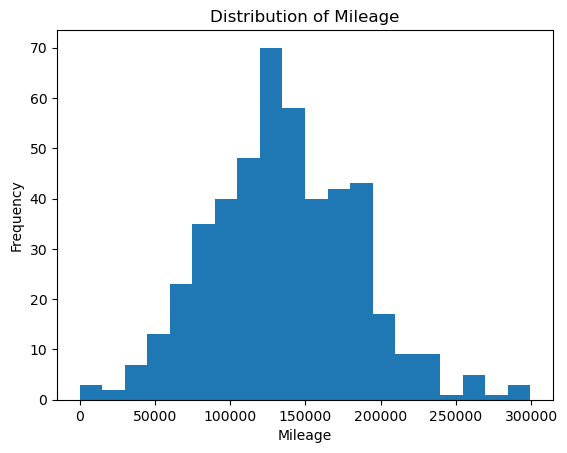

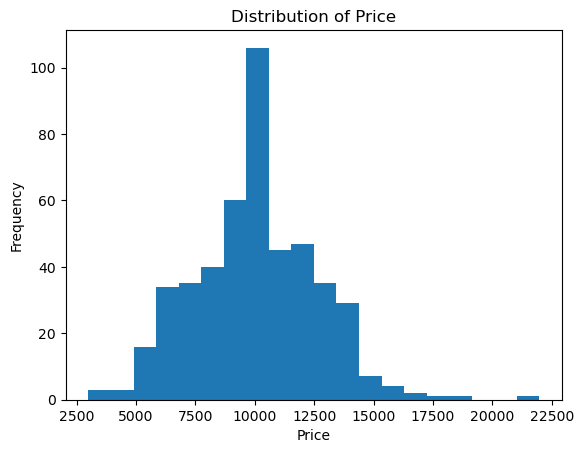

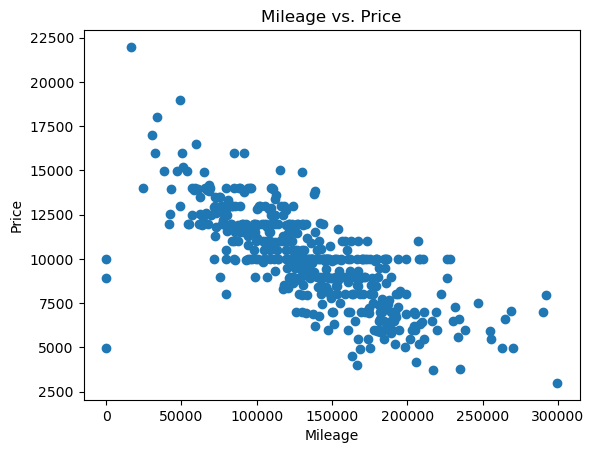

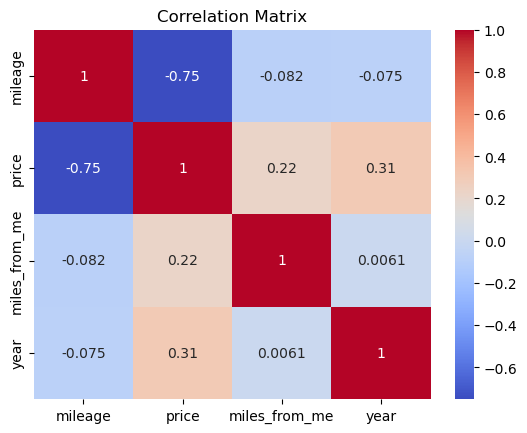

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive Statistics
# Calculate basic statistics for numerical columns
numerical_cols = ['mileage', 'price', 'miles_from_me', 'year']
statistics = df4[numerical_cols].describe()
display(statistics)

# Data Visualization
# Histogram of mileage
plt.hist(df4['mileage'], bins=20)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.show()

# Histogram of price
plt.hist(df4['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


# Scatter plot of mileage vs. price
plt.scatter(df4['mileage'], df4['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.show()

# Correlation Matrix Visualization
corr_matrix = df4[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

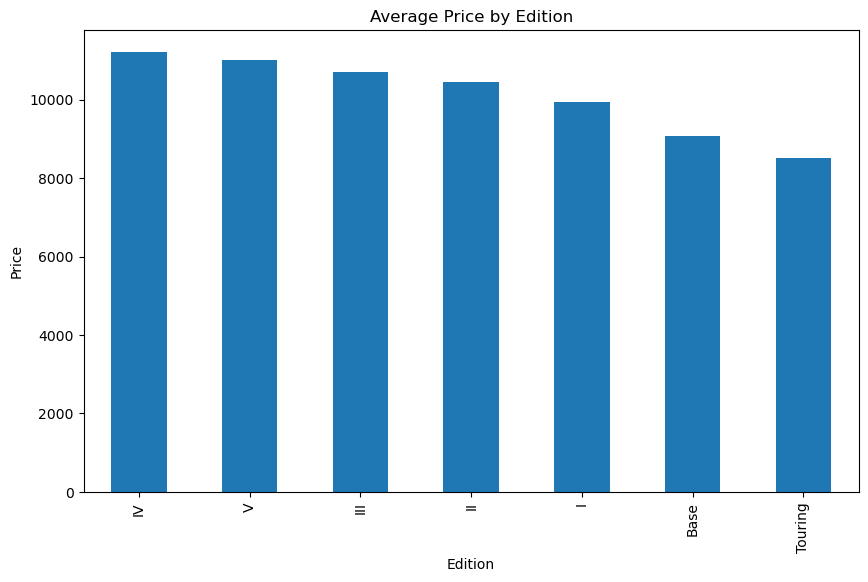

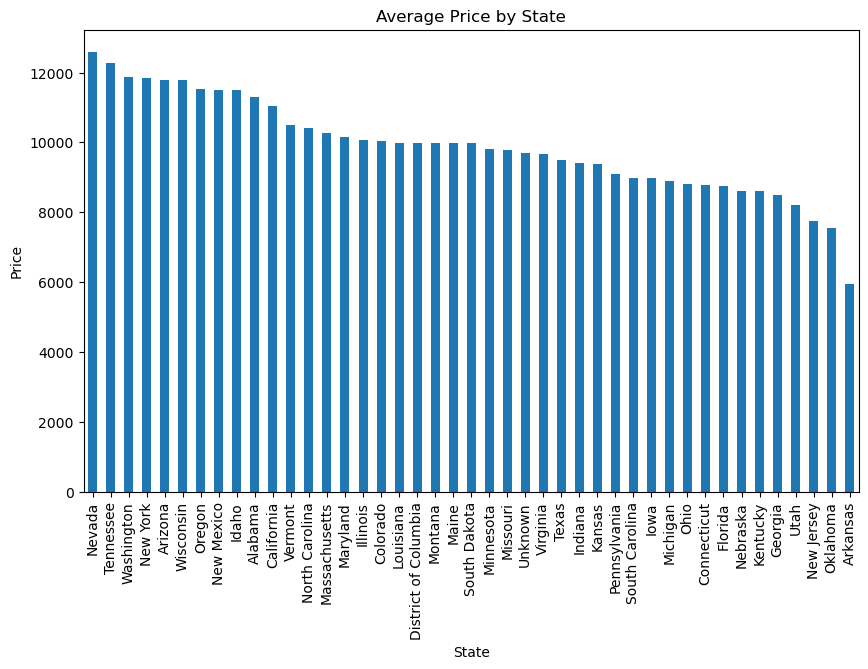

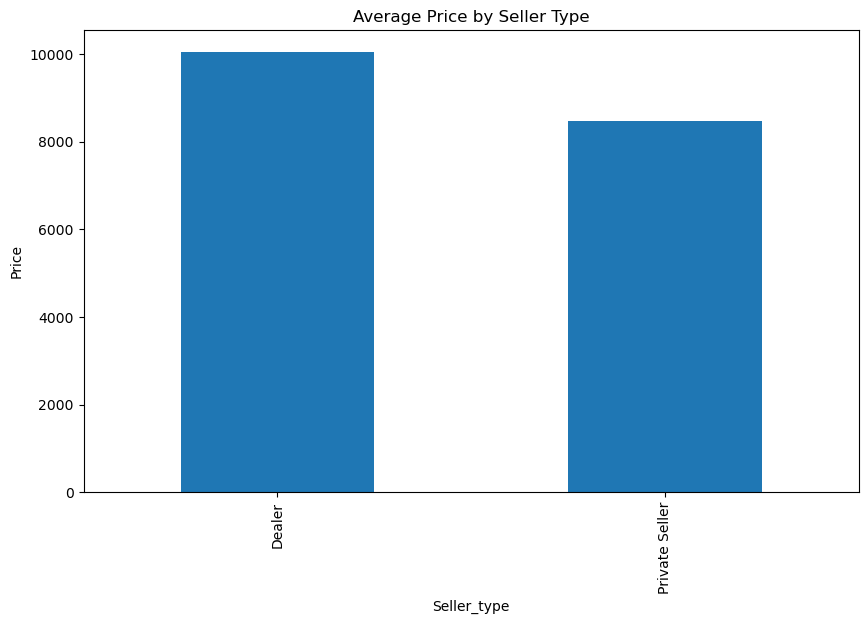

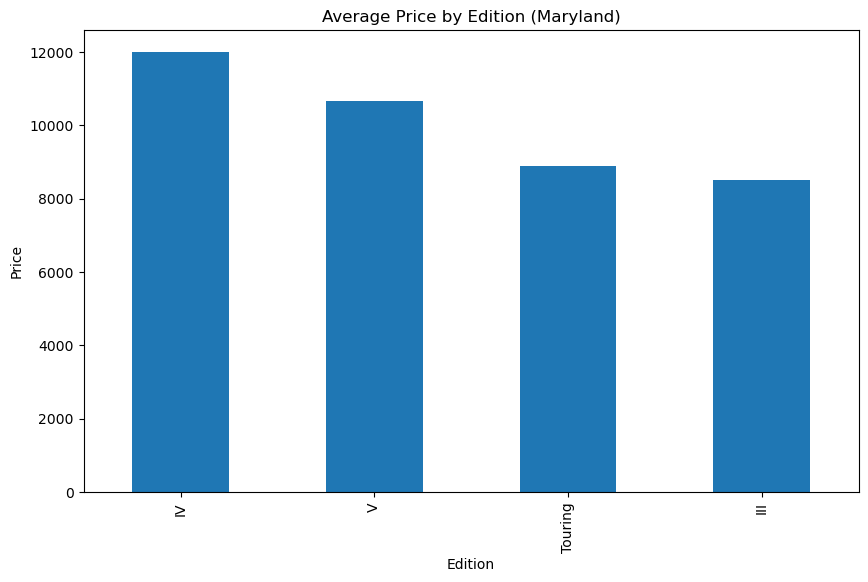

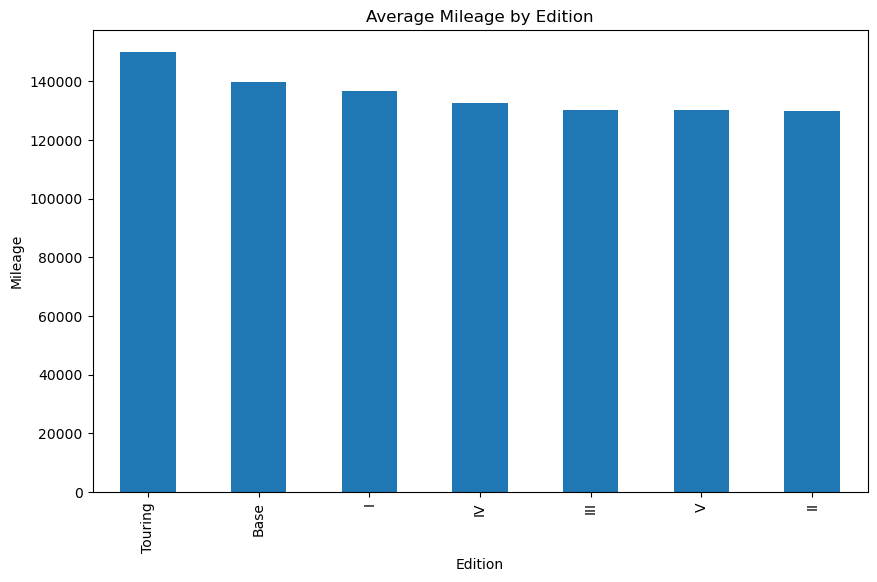

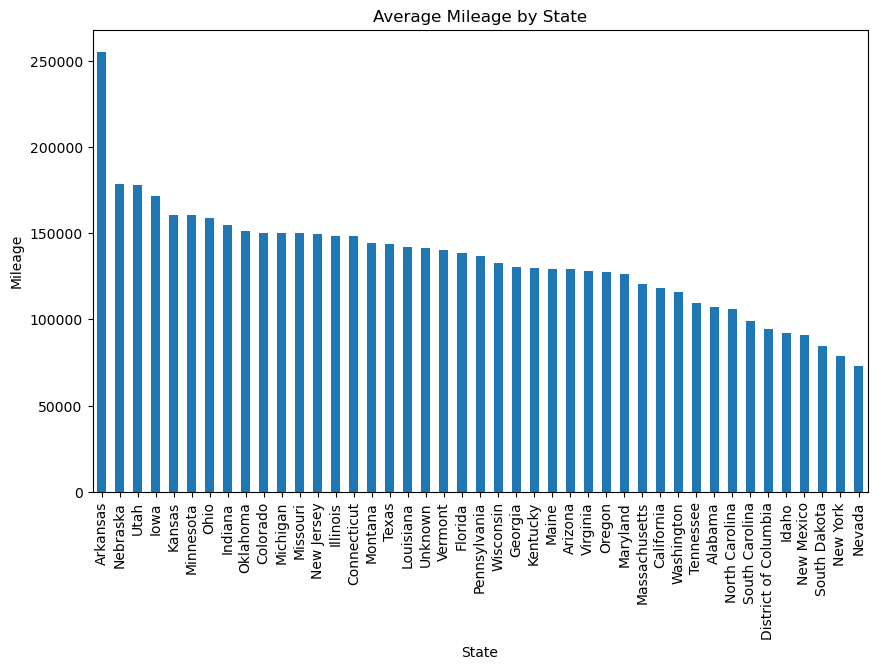

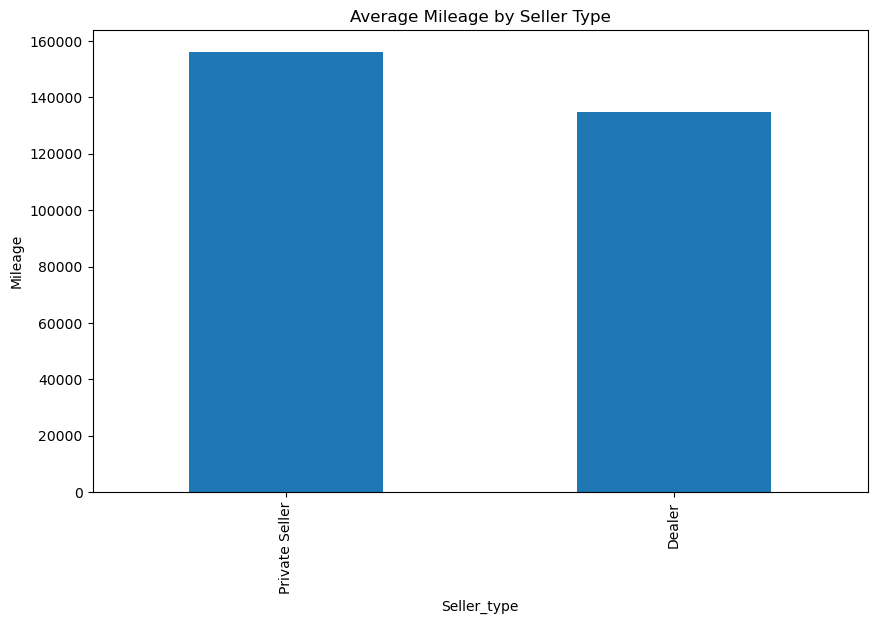

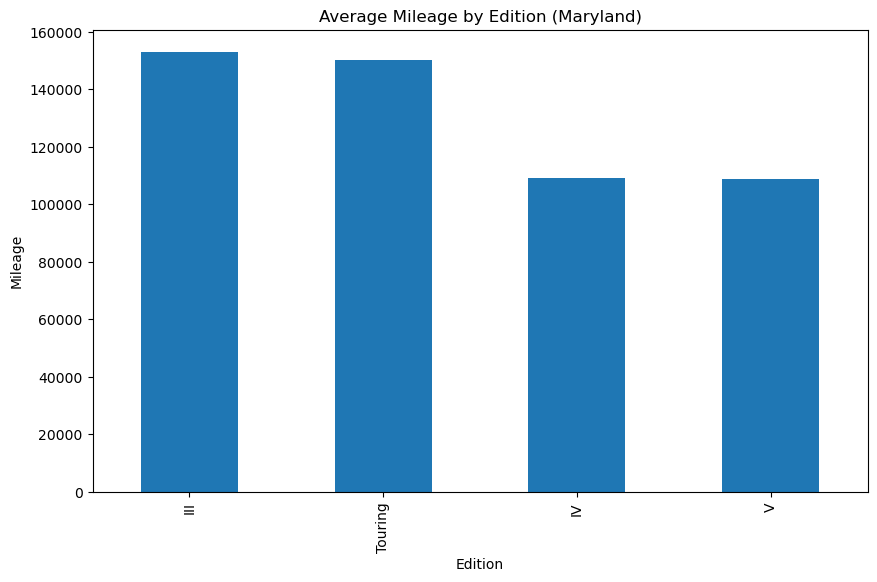

In [29]:
def group_and_plot(df, groupby_col, agg_col, title, y_label, state_filter=None):
    if state_filter:
        df = df[df['State'] == state_filter]
        
    grouped_values = df.groupby(groupby_col)[agg_col].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    grouped_values.plot(kind='bar')
    plt.xlabel(groupby_col.capitalize())
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

group_and_plot(df4, 'edition', 'price', 'Average Price by Edition', 'Price')
group_and_plot(df4, 'State', 'price', 'Average Price by State', 'Price')
group_and_plot(df4, 'seller_type', 'price', 'Average Price by Seller Type', 'Price')
group_and_plot(df4, 'edition', 'price', 'Average Price by Edition (Maryland)', 'Price', state_filter='Maryland')

group_and_plot(df4, 'edition', 'mileage', 'Average Mileage by Edition', 'Mileage')
group_and_plot(df4, 'State', 'mileage', 'Average Mileage by State', 'Mileage')
group_and_plot(df4, 'seller_type', 'mileage', 'Average Mileage by Seller Type', 'Mileage')
group_and_plot(df4, 'edition', 'mileage', 'Average Mileage by Edition (Maryland)', 'Mileage', state_filter='Maryland')

## 4. Model Training and Evaluation

### Set-up Model Pipelines and Split Dataset into Training and Testing Sets

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# Drop unnecessary columns
df5 = df4.drop(columns=["stock_type", "title", "dealer_name", "dealer_phone", "dealer_id", "AreaCode", "City"])

# Define preprocessor
numeric_features = ["mileage", "year", "miles_from_me"]
categorical_features = ["State", "edition", "seller_type"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])


# Define base models
lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()
xgb = XGBRegressor()

# Define stacked model
estimators = [
    ('ridge', ridge),
    ('lasso', lasso),
    ('rf', rf),
    ('xgb', xgb)
]
stacked = StackingRegressor(estimators=estimators, final_estimator=xgb)

# Define pipelines
lasso_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lasso)])
ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ridge)])
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf)])
xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb)])
stacked_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', stacked)])

# split data into X and y
X = df5.drop("price", axis=1)
y = df5["price"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

# Define a coarse grid of parameters for each model
param_grid_lasso = {'classifier__alpha': [0.1, 1.0, 10.0]}
param_grid_ridge = {'classifier__alpha': [0.1, 1.0, 10.0]}
param_grid_rf = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20]}
param_grid_xgb = {'classifier__n_estimators': [50, 100, 150], 
                  'classifier__max_depth': [3, 6, 9], 
                  'classifier__learning_rate': [0.01, 0.1, 0.2], 
                  'classifier__subsample': [0.5, 0.8, 1],
                  'classifier__colsample_bytree': [0.6, 0.8, 1]}

# Perform grid search for each model
grid_search_lasso = GridSearchCV(lasso_pipe, param_grid_lasso, cv=5)
grid_search_ridge = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5)
grid_search_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5)
grid_search_xgb = GridSearchCV(xgb_pipe, param_grid_xgb, cv=5)

# Fit each grid search (i.e., train models with best hyperparameters)
grid_search_lasso.fit(X_train, y_train)
print("lasso fitted")
grid_search_ridge.fit(X_train, y_train)
print("ridge fitted")
grid_search_rf.fit(X_train, y_train)
print("rf fitted")
grid_search_xgb.fit(X_train, y_train)
print("xgb fitted")
stacked_pipe.fit(X_train, y_train)
print("stacked fitted")

# Print best parameters for each model
print("Best parameters for Lasso: ", grid_search_lasso.best_params_)
print("Best parameters for Ridge: ", grid_search_ridge.best_params_)
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)


lasso fitted
ridge fitted
rf fitted
xgb fitted
stacked fitted
Best parameters for Lasso:  {'classifier__alpha': 10.0}
Best parameters for Ridge:  {'classifier__alpha': 10.0}
Best parameters for Random Forest:  {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best parameters for XGBoost:  {'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1}


### Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of models
models = [grid_search_lasso, grid_search_ridge, grid_search_rf, grid_search_xgb, stacked_pipe]
model_names = ["Lasso", "Ridge", "Random Forest", "XGBoost", "Stacked"]

for model, name in zip(models, model_names):
    # Predictions
    y_pred = model.predict(X_test)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # MAE
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}\n")


Model: Lasso
RMSE: 1458.1195844320725
R2: 0.7195087461141996
MAE: 1105.2028494154579

Model: Ridge
RMSE: 1443.2036671074245
R2: 0.7252179969431989
MAE: 1092.430276565156

Model: Random Forest
RMSE: 1299.367324954655
R2: 0.7772606641194564
MAE: 1002.4529221914238

Model: XGBoost
RMSE: 1262.8735858659177
R2: 0.7895965789300885
MAE: 986.512762840758

Model: Stacked
RMSE: 1477.5889276459231
R2: 0.7119682960053108
MAE: 1179.3619202958776



In [26]:
from sklearn.metrics import make_scorer

# Define custom scoring function (how often was the prediction within the range of y_true plus or minus rmse)
def within_rmse(y_true, y_pred, rmse=1343.9070038533741):
    return np.mean(np.abs(y_true - y_pred) <= rmse)

# Create a custom scorer
custom_scorer = make_scorer(within_rmse, greater_is_better=True)

# Generate predictions
y_pred_xgb = grid_search_xgb.predict(X_test)

# Calculate custom score
custom_score_xgb = custom_scorer(grid_search_xgb, X_test, y_test)

print(f"Custom Score for XGBoost: {custom_score_xgb}")

Custom Score for XGBoost: 0.7127659574468085


### Understand which features were most impactful

In [27]:
# Extract preprocessor and trained classifier from the pipeline
preprocessor = grid_search_xgb.best_estimator_.named_steps['preprocessor']
classifier = grid_search_xgb.best_estimator_.named_steps['classifier']

# Get feature importances
importances = classifier.feature_importances_

# Get feature names
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine and sort feature names and importances
features = np.concatenate([numeric_features, categorical_features])
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances.sort_values('importance', ascending=False, inplace=True)

feature_importances

,feature,importance
0,mileage,0.217811
36,State_Tennessee,0.088625
38,State_Unknown,0.055078
2,miles_from_me,0.053006
1,year,0.048855
26,State_New Jersey,0.045551
44,edition_Base,0.040069
13,State_Indiana,0.038414
42,State_Washington,0.034699
19,State_Massachusetts,0.033375


### Here I will get the XGBoost model's prediction for the price of my Prius

In [28]:
# Define new data for the car you want to predict the price of
new_data = pd.DataFrame({
    "mileage": [138000],
    "year": [2009],
    "miles_from_me": [0],
    "State": ["Maryland"],
    "edition": ["Base"],
    "seller_type": ["Private Seller"]
})

# Preprocess and predict
predicted_price = grid_search_xgb.predict(new_data)

print("Predicted price: ", predicted_price[0])

Predicted price:  8866.42


## Conclusion

### The Prius can be sold for `$8866.42 + or - $1262.87`